lIBRARIES

In [1]:
import os
import numpy as np
import cv2
import random
import matplotlib.pyplot as plt
import pickle
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense,Flatten
from tensorflow.keras.preprocessing import image
import numpy as np
import tkinter as tk
from tkinter import filedialog


In [ ]:
import os
import random
import shutil

# Define paths to directories containing cat and dog images
cat_dir = r'C:\Users\sound\Downloads\kagglecatsanddogs_3367a\PetImages\Cat'
dog_dir = r'C:\Users\sound\Downloads\kagglecatsanddogs_3367a\PetImages\Dog'

# Define paths for training and validation directories
train_dir = 'train'
validation_dir = 'validation'

# Create directories for training and validation if they don't exist
os.makedirs(os.path.join(train_dir, 'cat'), exist_ok=True)
os.makedirs(os.path.join(train_dir, 'dog'), exist_ok=True)
os.makedirs(os.path.join(validation_dir, 'cat'), exist_ok=True)
os.makedirs(os.path.join(validation_dir, 'dog'), exist_ok=True)

# Function to move images to their respective directories
def move_images(image_list, destination_dir):
    for img_path in image_list:
        img_name = os.path.basename(img_path)
        destination_path = os.path.join(destination_dir, img_name)
        shutil.copy(img_path, destination_path)

# List all image files in the cat and dog directories
cat_images = [os.path.join(cat_dir, img) for img in os.listdir(cat_dir)]
dog_images = [os.path.join(dog_dir, img) for img in os.listdir(dog_dir)]

# Shuffle the lists to randomize the order of images
random.shuffle(cat_images)
random.shuffle(dog_images)

# Define ratio for splitting data into training and validation sets
split_ratio = 0.8  # 80% training, 20% validation

# Split the lists into training and validation sets
cat_train_count = int(len(cat_images) * split_ratio)
dog_train_count = int(len(dog_images) * split_ratio)

cat_train_images = cat_images[:cat_train_count]
cat_validation_images = cat_images[cat_train_count:]

dog_train_images = dog_images[:dog_train_count]
dog_validation_images = dog_images[dog_train_count:]

# Move images to their respective directories for training and validation
move_images(cat_train_images, os.path.join(train_dir, 'cat'))
move_images(cat_validation_images, os.path.join(validation_dir, 'cat'))

move_images(dog_train_images, os.path.join(train_dir, 'dog'))
move_images(dog_validation_images, os.path.join(validation_dir, 'dog'))

print("Data split and moved successfully!")


Data split and moved successfully!


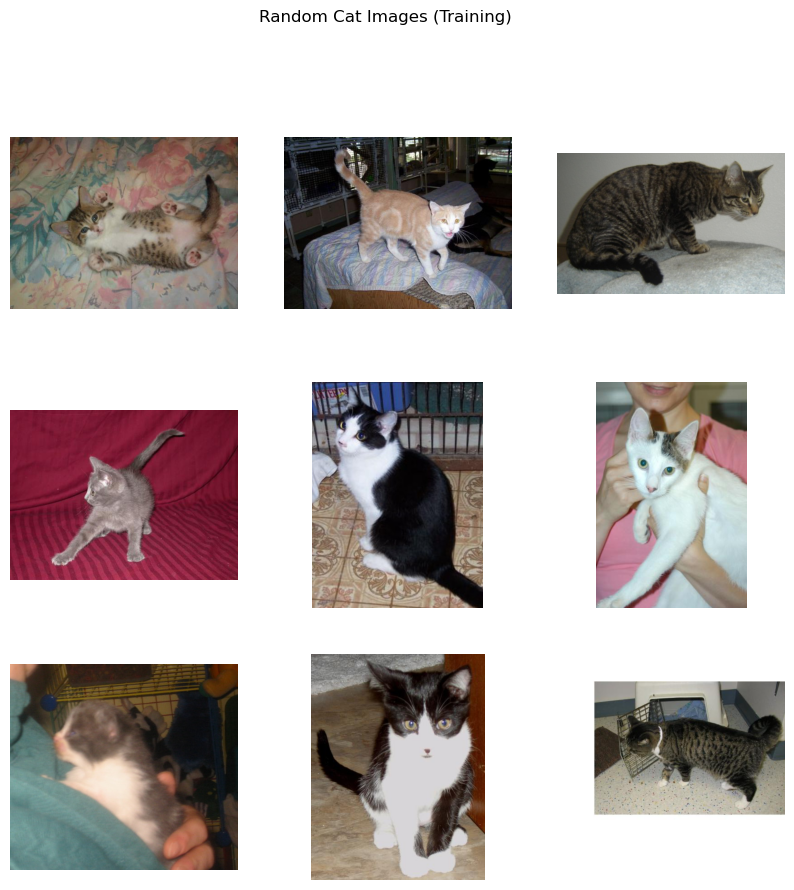

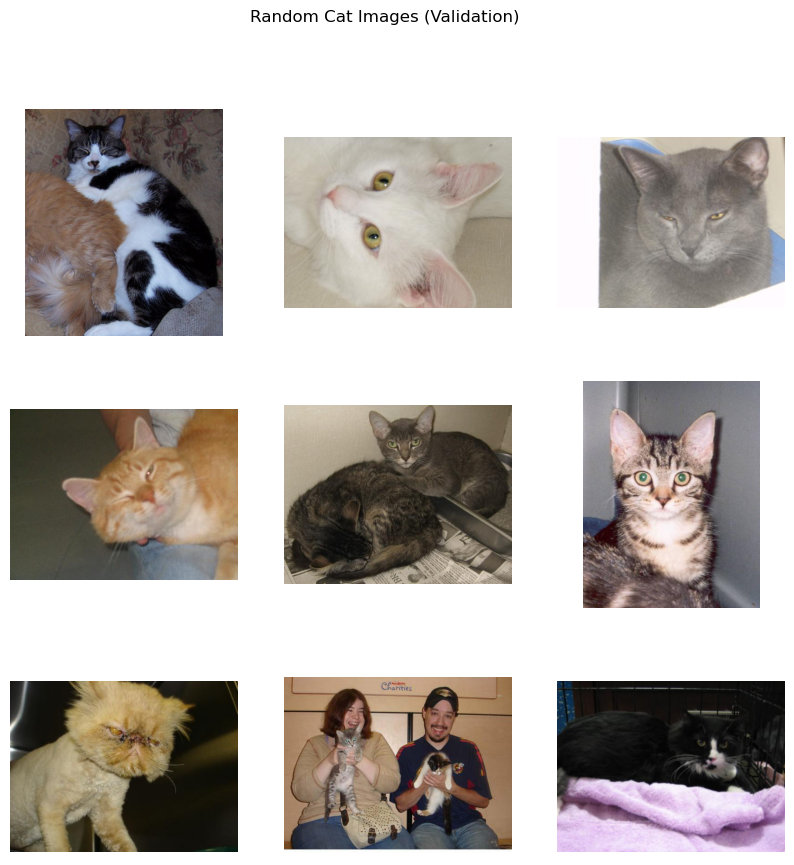

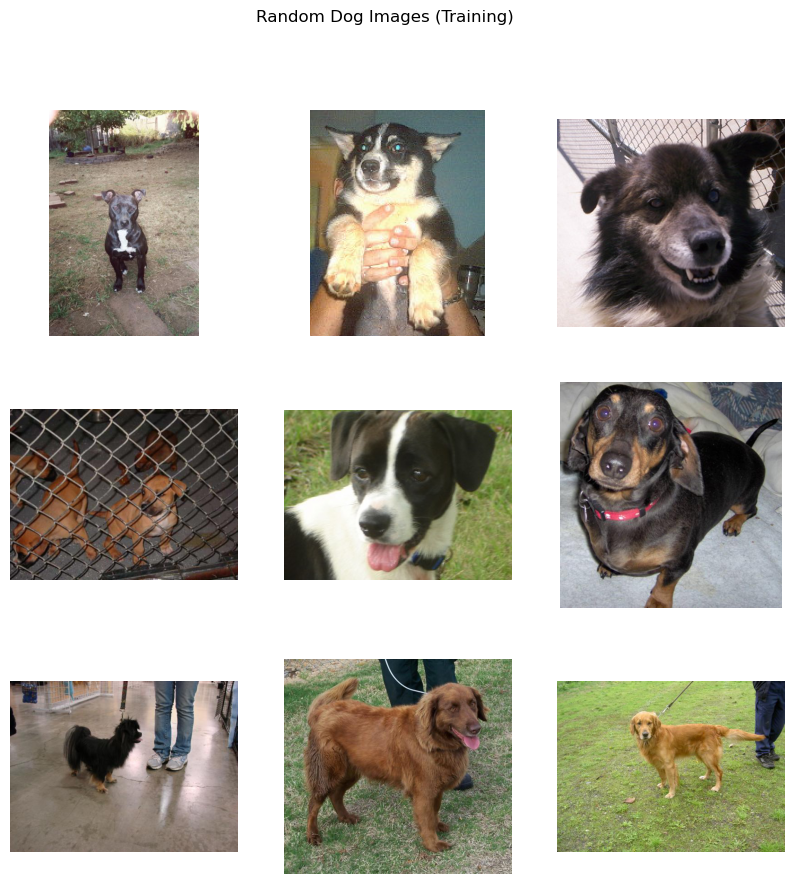

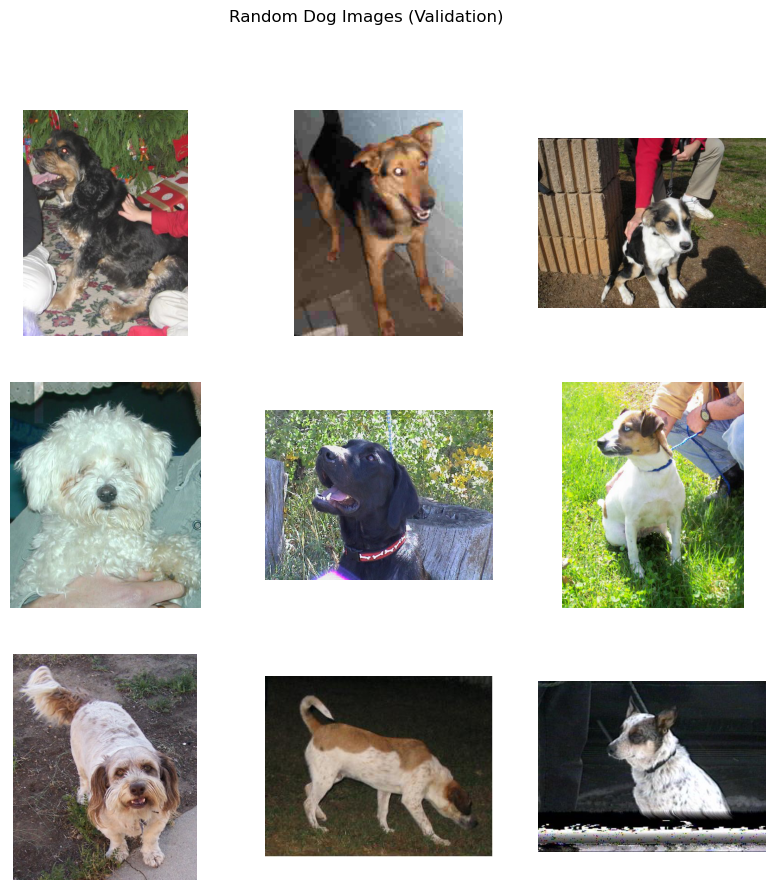

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Function to display random images
def display_random_images(image_list, title):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        img_path = random.choice(image_list)
        img = mpimg.imread(img_path)
        plt.subplot(3, 3, i+1)
        plt.imshow(img)
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Display random cat images from training and validation sets
display_random_images(cat_train_images, 'Random Cat Images (Training)')
display_random_images(cat_validation_images, 'Random Cat Images (Validation)')

# Display random dog images from training and validation sets
display_random_images(dog_train_images, 'Random Dog Images (Training)')
display_random_images(dog_validation_images, 'Random Dog Images (Validation)')



In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image dimensions and batch size
img_width, img_height = 224, 224
batch_size = 32

# Data Augmentation and Normalization
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1. / 255)

# Flow training images in batches using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

# Flow validation images in batches using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')


Found 24756 images belonging to 2 classes.
Found 12172 images belonging to 2 classes.


In [4]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers
from tensorflow.keras import Model

# Load pre-trained VGG16 model
base_model = VGG16(input_shape=(img_width, img_height, 3),
                   include_top=False,
                   weights='imagenet')

# Freeze the convolutional base
for layer in base_model.layers:
    layer.trainable = False

# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output)

# Add a fully connected layer with ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Add a final sigmoid layer for classification
output = layers.Dense(1, activation='sigmoid')(x)




In [5]:

# Compile the model
model = Model(base_model.input, output)
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [12]:
history = model.fit(train_generator,
                    steps_per_epoch=100,
                    epochs=5,
                    validation_data=validation_generator,
                    validation_steps=100)

Epoch 1/5
100/100 [==============================] - 469s 5s/step - loss: 0.3934 - accuracy: 0.8169 - val_loss: 0.2288 - val_accuracy: 0.9056
Epoch 2/5
100/100 [==============================] - 627s 6s/step - loss: 0.3687 - accuracy: 0.8334 - val_loss: 0.2396 - val_accuracy: 0.9013
Epoch 3/5
 10/100 [==>...........................] - ETA: 5:25 - loss: 0.3363 - accuracy: 0.8656

c:\Users\sound\anaconda3\Lib\site-packages\PIL\TiffImagePlugin.py:858: UserWarning: Truncated File Read
  warnings.warn(str(msg))


100/100 [==============================] - 706s 7s/step - loss: 0.3540 - accuracy: 0.8456 - val_loss: 0.2032 - val_accuracy: 0.9178
Epoch 4/5
100/100 [==============================] - 734s 7s/step - loss: 0.3319 - accuracy: 0.8434 - val_loss: 0.1926 - val_accuracy: 0.9197
Epoch 5/5
100/100 [==============================] - 734s 7s/step - loss: 0.3401 - accuracy: 0.8500 - val_loss: 0.1947 - val_accuracy: 0.9137


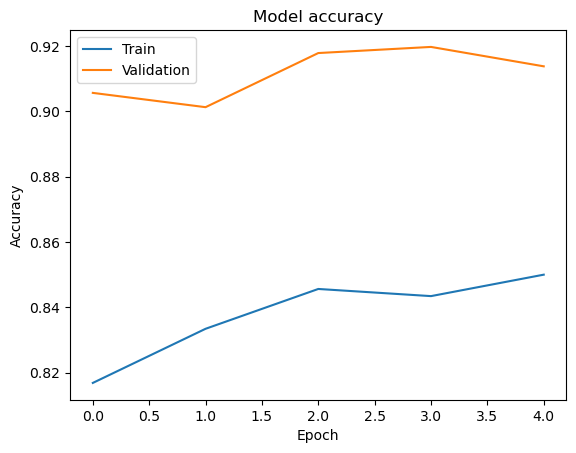

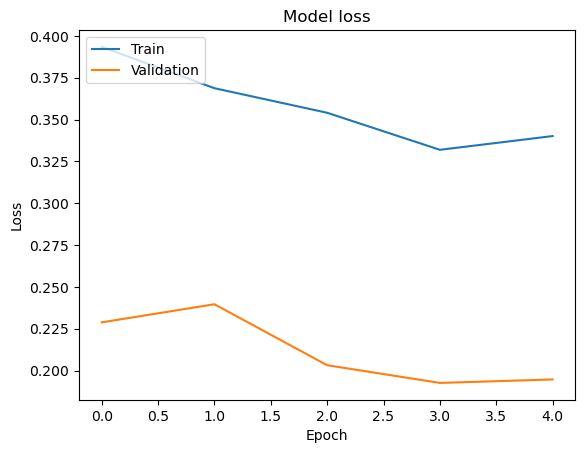

In [13]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [19]:
model.save('my_model.h5')  # Save model to HDF5 file


c:\Users\sound\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import tkinter as tk
from tkinter import filedialog

# Create a Tkinter root window
root = tk.Tk()
root.withdraw()  # Hide the root window

# Open a file picker dialog to select the image
file_path = filedialog.askopenfilename()

# Check if a file was selected
if file_path:
    # Load the selected image
    img = image.load_img(file_path, target_size=(img_width, img_height))

    # Convert the image to a numpy array
    img_array = image.img_to_array(img)

    # Expand the dimensions to match the input shape expected by the model
    img_array = np.expand_dims(img_array, axis=0)

    # Preprocess the input image (e.g., normalize pixel values)
    img_array = img_array / 255.0  # Assuming your training data was normalized in this way

    # Make predictions
    predictions = model.predict(img_array)

    # Convert the predictions to human-readable labels (e.g., class names)
    class_names = ['cat', 'dog']  # Assuming binary classification with 'cat' and 'dog' labels
    predicted_class = class_names[int(predictions[0][0])]

    print(f'The predicted class is: {predicted_class}')
else:
    print("No file selected. Please try again.")
